<div style="margin-bottom: 120px;">
    <div style="float:left;">
        <br/>
        <img src="notebooks-img/udc.png" width="300"/>
    </div>
</div>
<h1 style="color: #d60e8c;">Práctica 2 - Preprocesado de imágenes</h1> 

#### Autores:

* Nombre autor 1
* Nombre autor 2


<h2>Contenidos</h2>
<div class="alert alert-block alert-info" 
     style="margin-top: 20px; padding-top:0px; border: 1px solid #d60e8c; border-radius: 20px; background:transparent;">
    <ul>
        <li>Filtros de suavizado y realce.</li>
        <li>Filtrado en base a histograma.</li>
    </ul>
</div>

<a name="intro"></a>
<h1 style="color: #d60e8c;">Librerías y utilidades para la realización de la práctica</h1>
<hr style="border: 0.5px solid #d60e8c;">

Antes de nada es necesario cargar las librerías y funciones de utilidad que usaremos en la práctica.

## Importamos las librerías que utilizaremos en la práctica

In [1]:
%matplotlib inline
import skimage
import numpy as np
import matplotlib.pylab as plt

from skimage.io import imread
from skimage import exposure
from skimage import filters
from skimage.morphology import disk

## Definimos una función para facilitar la tarea de mostrar varias imágenes
<div>
    A la función <b>show_row_of_gray_images</b> se le pasarán los siguientes parámetros:
    <ul>    
        <li> El primer parámetro es el ancho total de la figura.
        <li> Los siguientes parámetros serán las variables que continen las imágenes que queremos mostrar.
   </ul>
</div>
<div>
    Ejemplo de uso: <b>show_row_of_gray_images(20, img1, img2, img3, img4)</b>
<br/>
Ejemplo de uso: <b>show_row_of_gray_images(10, img1, img2)</b>
<br/>
Ejemplo de uso: <b>show_row_of_gray_images(10, img1)</b>
</div>

In [2]:
def show_row_of_gray_images(fig_width, *images):
    plt.figure(figsize=(fig_width, fig_width))
    images_count = len(images)
    index = 1  
    for image in images:
        plt.subplot(1, images_count, index)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        index+=1

<a name="filter"></a>
<h1 style="color: #d60e8c;">Uso de filtros para suavizado y realce</h1>
<hr style="border: 0.5px solid #d60e8c;">

Existen multitud de filtros para suavizado y realce de imagen. En esta práctica trabajaremos con los siguientes.

<b>Suavizado y eliminación de ruido</b>

- Filtro gausiano: https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian
- Filtro de mediana: https://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=median#skimage.filters.median

<b>Realce de bordes</b>

- Laplaciano: https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.laplace
- Sobel: https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.sobel

<b>Manipulación del histograma</b>
- Ecualización: https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist
- Ecualiación adaptativa: https://scikit-image.org/docs/stable/api/skimage.filters.rank.html?highlight=filters%20rank%20equalize#skimage.filters.rank.equalize

## Definimos una función para facilitar la tarea de mostrar varias imágenes
A la función (show_row_of_gray_images) se le pasarán los siguientes parámetros:
* El primer parámetro es el ancho de la figura.
* Los siguientes parámetros serán las variables con las imágenes que queremos mostrar.


Ejemplo de uso: show_row_of_gray_images(20, img1, img2, img3, img4)
Ejemplo de uso: show_row_of_gray_images(10, img1, img2)
Ejemplo de uso: show_row_of_gray_images(10, img1)

<h2>Ejemplo de uso de filtros</h2> 
Aplicamos varios filtros a la misma imagen.
<br/><br/>
<b>SE RECOMIENDA PROBAR A VARIAR LOS PARÁMETROS DE LOS FILTROS PARA VER SU EFECTO</b>

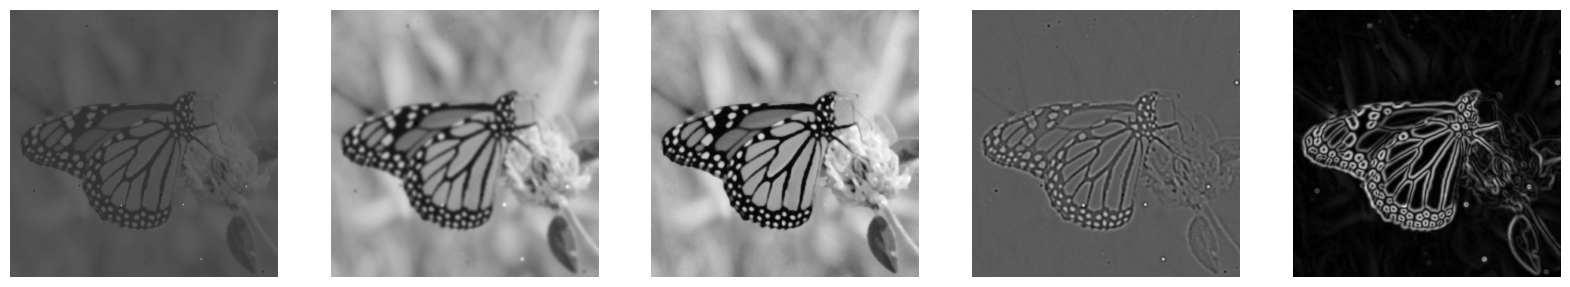

In [31]:
image = imread('img/mariposa.png', as_gray=True)

#Filtro de suavizado gaussiano 
#El parámetro SIGMA se relaciona con el tamaño del kernel (matriz) de convolución del filtro. Para un mismo tamaño de imagen, un mayor sigma suaviza más la imagen.
im2 = filters.gaussian(image, sigma=4)

#Filtro de suavizado de mediana
#El segundo parámetro es una matriz de convolución del tamaño indicado (mayor tamaño => más píxeles vecinos utilizados). 
im3 = skimage.filters.median(image, disk(5))

#Filtro de realce de bordes laplaciano
im4 = filters.laplace(im2, ksize=3)

#Filtro de realce de bordes Sobel (aplicado en horizontal y en vertical)
im5 = filters.sobel(im2)

show_row_of_gray_images(20, image, im2, im3, im4, im5)

## Encadenamiento de filtros y operaciones sobre imágenes
* Podemos aplicar varios filtros consecutivos a una imagen. 

* Los filtros, como etapa de preprocesado, se aplican para mejorar la imagen antes de realizar otras operaciones. 
* <b>Se pueden utilizar por ejemplo antes de una binarización para que el resultado sea mejor (eliminar ruido, suavizar imagen para eliminar detalles molestos, etc).</b>

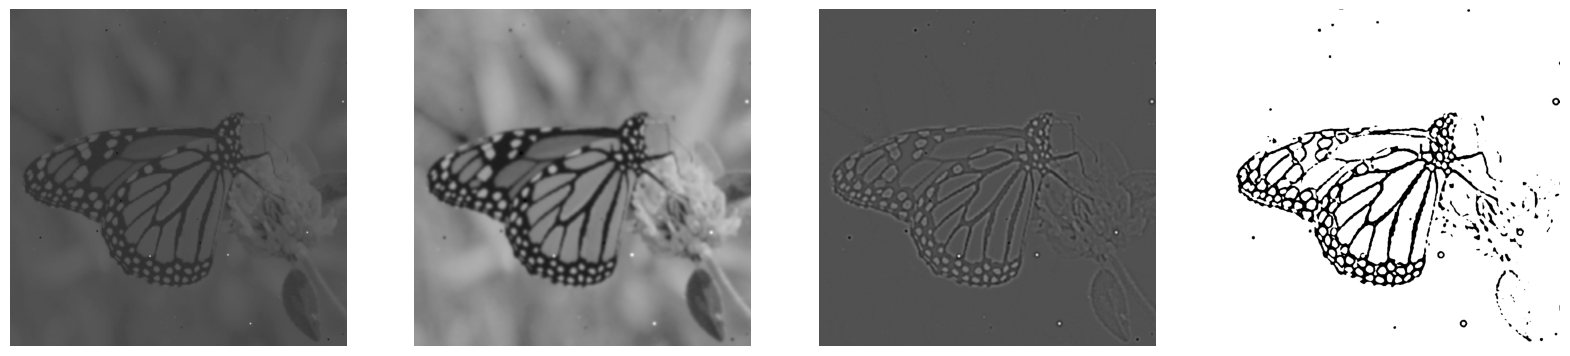

In [32]:
image = imread('img/mariposa.png', as_gray=True)

# Suavizado de la imagen
im2 = filters.gaussian(image, sigma=3)

# Al resultado de la imagen suavizada con un filtro gausiano le aplicamos un segundo filtro de realce de bordes
im3 = filters.laplace(im2, ksize=3)

# Binarización tras aplicar filtros
thresh = filters.threshold_otsu(im3)
im4 = im3 > thresh

# Mostrar imágenes
show_row_of_gray_images(20, image, im2, im3, im4)

<div class="alert alert-block alert-info" 
     style="border: 0px solid #d60e8c; border-radius: 10px; background:#d60e8c; color: white;">
   <h2>EJERCICIO</h2>
    <hr style="border: 0.5px solid #ffffff;">
    <ul style="margin-bottom: 20px;">
        <li>Realizar una binarización de la imagen 'herramienta.png' con el método OTSU, buscando obtener una forma sólida de la herramienta perfectamente separada del fondo.</li>
        <li>Considérese la utilización de algún filtrado <u>previo a la binarización</u> que mejore el resultado.</li>
        <li>Visualizar la imagen original y la imagen binarizada con y sin filtrado previo. 
    </ul>
Imagen original y resultado buscado:<br><br>
<img src="img/herramienta.png" style="align:left;margin-right:20px;" width="200">  
<img src="img/herramienta-filtrada-y-binarizada.png" width="200" >        
</div>

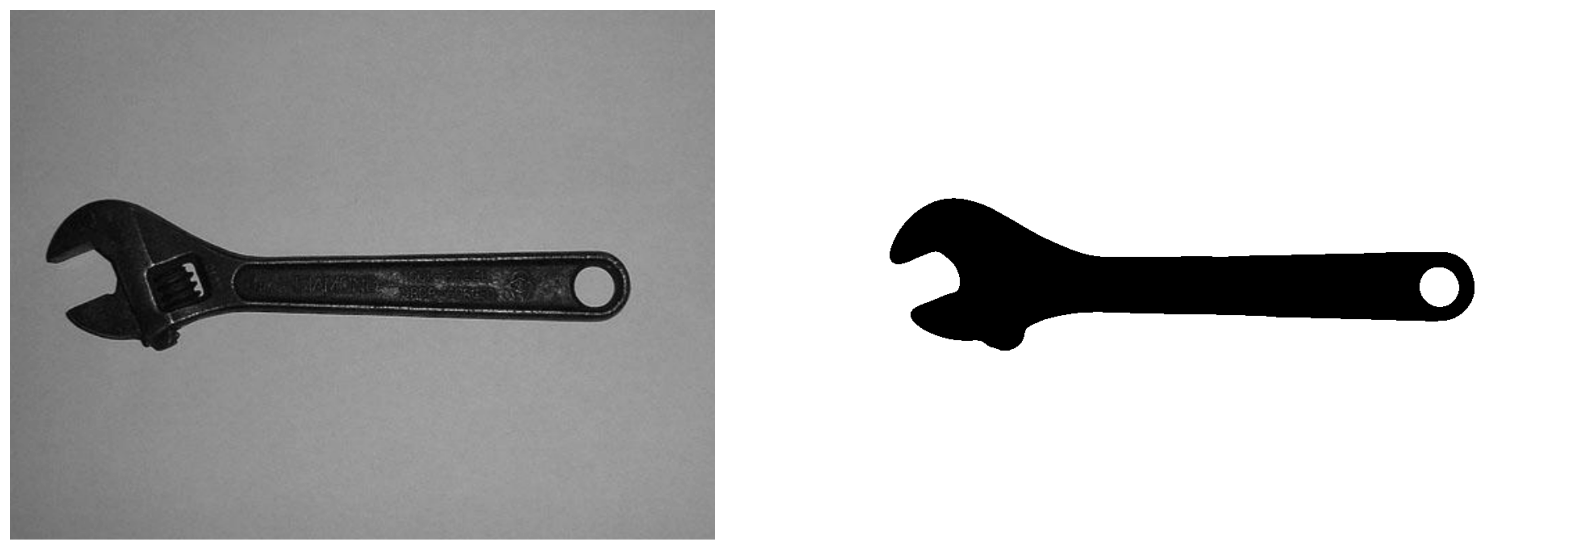

In [94]:
# AÑADE AQUÍ EL CÓDIGO NECESARIO

image = imread('img/herramienta.png', as_gray=True)

# Suavizado de la imagen
im2 = filters.gaussian(image, sigma=5)
#im2 = skimage.filters.median(image, disk(5))

# Binarización tras aplicar filtros
thresh = filters.threshold_otsu(im2)
im3 = im2 > thresh

# Mostrar imágenes
show_row_of_gray_images(20, image, im3)



<div class="alert alert-block alert-info" 
     style="border: 0px solid #d60e8c; border-radius: 10px; background:#d60e8c; color: white;">
   <h2>EJERCICIO</h2>
    <hr style="border: 0.5px solid #ffffff;">
    <ul style="margin-bottom: 20px;">
        <li>Realizar una binarización de la imagen 'monedas-ruido.png' con el método OTSU, buscando obtener la forma sólida de las monedas, que permitiría por ejemplo calcular su diámetro.</li>
        <li>Considérese la utilización de algún filtrado <u>previo a la binarización</u> que mejore el resultado (eliminación de ruido y de detalles).</li>
        <li>Visualizar la imagen original y la imagen binarizada con y sin filtrado previo. 
    </ul>
Imagen original y resultado buscado:<br><br>
<img src="img/monedas-ruido.png" style="align:left;margin-right:20px;" width="200">  
<img src="img/monedas-ruido-filtrada-y-binarizada.png" width="205" >         
</div>

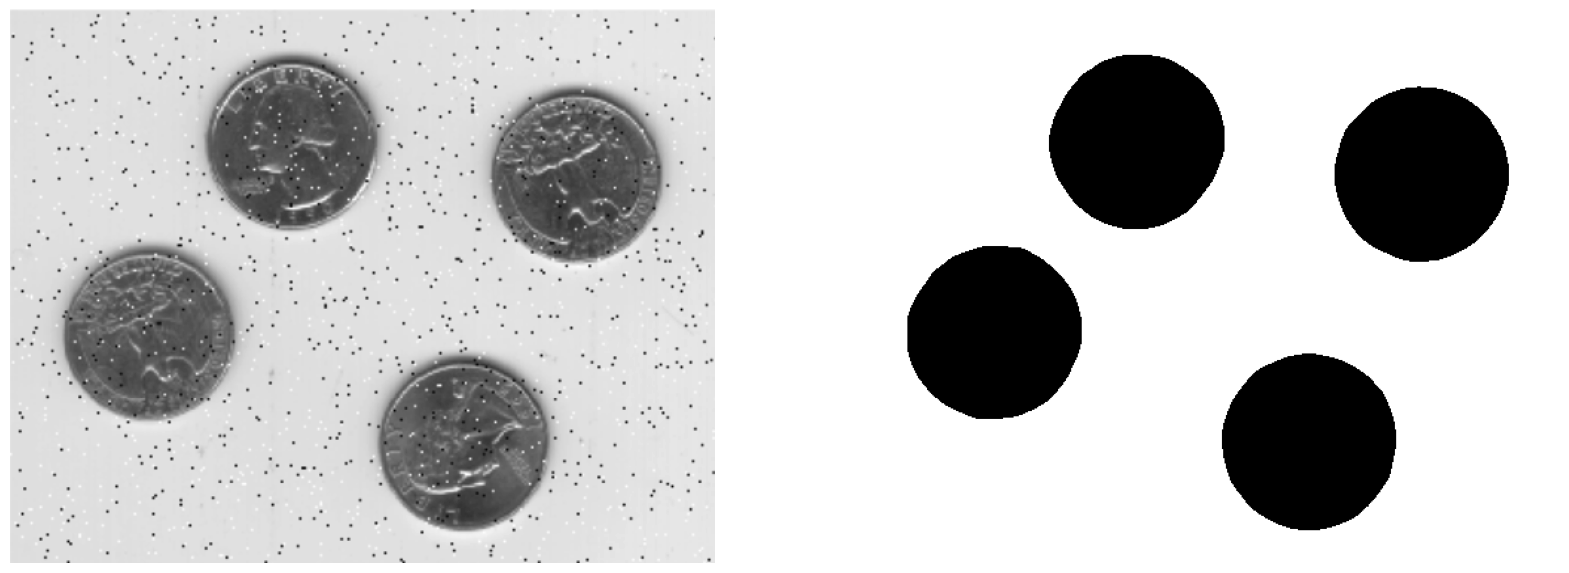

In [102]:
# AÑADE AQUÍ EL CÓDIGO NECESARIO

image = imread('img/monedas-ruido.png', as_gray=True)

# Suavizado de la imagen
im2= filters.gaussian(image, sigma=5)
#im2 = skimage.filters.median(image, disk(5))

# Binarización tras aplicar filtros
thresh = filters.threshold_otsu(im2)
im3 = im2 > thresh

# Mostrar imágenes
show_row_of_gray_images(20, image, im3)



<div class="alert alert-block alert-info" 
     style="border: 0px solid #d60e8c; border-radius: 10px; background:#d60e8c; color: white;">
   <h2>EJERCICIO</h2>
    <hr style="border: 0.5px solid #ffffff;">
    <ul style="margin-bottom: 20px;">
        <li>Intentar obtener una imagen realzada a partir de la imagen 'realce.png'.</li>
        <li>Se debe tener en cuenta que la imagen tiene ruido y que nos interesa identificar el contorno de la figura.</li>
        <li>NOTA: En el directorio 'img' se incluye una imagen ilustrativa de la solución deseada ('realce-solucion.png').
    </ul>
Imagen original y resultado buscado:<br><br>
<img src="img/realce.png" style="align:left;margin-right:20px;" width="150">  
<img src="img/realce-solucion.png" width="150" >   
</div>

 

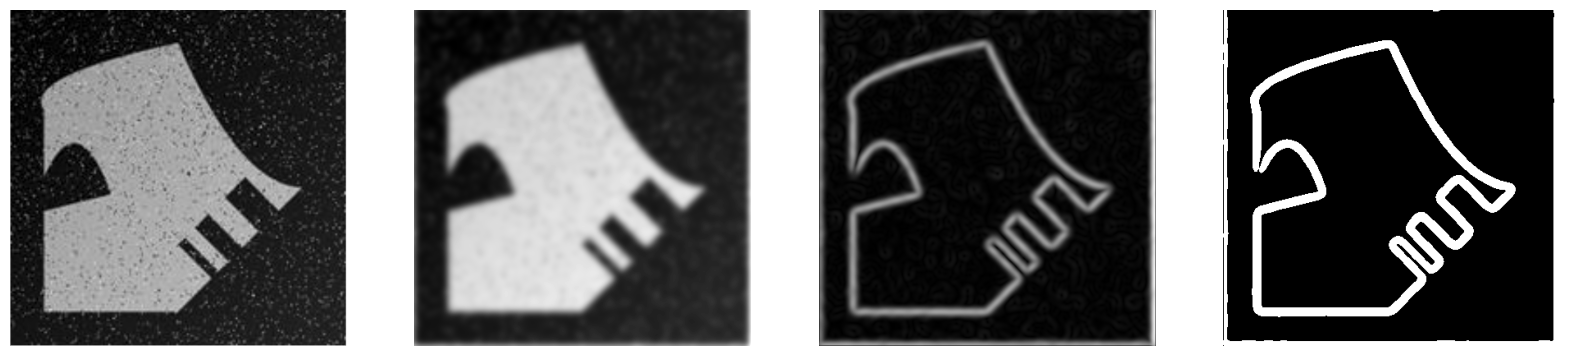

In [124]:
# AÑADE AQUÍ EL CÓDIGO NECESARIO

image = imread('img/realce.png', as_gray=True)

# Suavizado de la imagen
im2 = filters.gaussian(image, sigma=4)
#im2 = skimage.filters.median(image, disk(10))

# Al resultado de la imagen suavizada con un filtro gausiano le aplicamos un segundo filtro de realce de bordes
#im3 = filters.laplace(im2, ksize=10)
im3 = filters.sobel(im2)

# Binarización tras aplicar filtros
thresh = filters.threshold_otsu(im3)
im4 = im3 > thresh

# Mostrar imágenes
show_row_of_gray_images(20, image, im2, im3, im4)


<div class="alert alert-block alert-info" 
     style="border: 0px solid #d60e8c; border-radius: 10px; background:#d60e8c; color: white;">
   <h2>EJERCICIO</h2>
    <hr style="border: 0.5px solid #ffffff;">
    <ul style="margin-bottom: 20px;">
        <li>Realizar una binarización de la imagen 'noisy.png' con el método OTSU, intentando que no se solapen regiones que no estaban conectadas.</li>
        <li>Considérese la utilización de algún filtrado <u>previo a la binarización</u> que mejore el resultado (mitigación de ruido).</li>
        <li>Visualizar la imagen original y la imagen binarizada con y sin filtrado previo. 
    </ul>
Imagen original y el resultado buscado:<br><br>
<img src="img/noisy.png" style="align:left;margin-right:20px;" width="150">  
<img src="img/noisy-filtrada-y-binarizada.png" width="150" >    
</div>

In [8]:
# AÑADE AQUÍ EL CÓDIGO NECESARIO

image = imread('img/noisy.png', as_gray=True)






<div class="alert alert-block alert-info" 
     style="border: 0px solid #d60e8c; border-radius: 10px; background:#d60e8c; color: white;">
   <h2>EJERCICIO</h2>
    <hr style="border: 0.5px solid #ffffff;">
    <ul style="margin-bottom: 20px;">
        <li>Aplicar un filtro gausiano a la imagen en color 'denoising.png' para intentar reducir el ruido. Consultar la documentación de la función para saber como aplicar el filtro gausiano a una imagen multicanal (color). </li>
        <li>Visualizar la imagen original y la imagen mejorada en color y en un tamaño bastante grande para apreciar los cambios.</li>
        <li>Explicar razonadamente los efectos generados en la imagen resultado.</li>
    </ul>
</div>

In [9]:
# AÑADE AQUÍ EL CÓDIGO NECESARIO

image = imread('img/denoising.png', as_gray=False)





<div class="alert alert-block alert-info" 
     style="border: 0px solid #d60e8c; border-radius: 10px; background:#d60e8c; color: white;">
   <h2>EJERCICIO</h2>
    <hr style="border: 0.5px solid #ffffff;">
    <ul style="margin-bottom: 20px;">
        <li>Aplicar un filtro a la imagen 'medica.png' para mejorarla, realzando el contraste en los huesos de las costillas.
<br>Imagen original y resultado buscado:<br><br>
<img src="img/medica.png" style="align:left;margin-right:20px;" width="150">  
<img src="img/medica-mejorada.png" width="150" >   
            <br>
        </li>
        <li>Visualizar la imagen original y la imagen mejorada.</li>
    </ul>
             
</div>

In [10]:
# AÑADE AQUÍ EL CÓDIGO NECESARIO

image = imread('img/medica.png', as_gray=True)





<div class="alert alert-block alert-info" 
     style="border: 0px solid #d60e8c; border-radius: 10px; background:#d60e8c; color: white;">
   <h2>EJERCICIO</h2>
    <hr style="border: 0.5px solid #ffffff;">
    <ul style="margin-bottom: 20px;">
         <li>Aplicar un filtro a la imagen 'retina.png' para mejorarla, realzando el contraste en las arterias y venas. <br>
Imagen original y resultado buscado:<br>
<img src="img/retina.png" style="align:left;margin-right:20px;" width="180">  
<img src="img/retina-mejorada.png" width="180">  
             <br>
        </li>
        <li>Visualizar la imagen original y la imagen mejorada.</li>
    </ul>
</div>

In [11]:
# AÑADE AQUÍ EL CÓDIGO NECESARIO

image = imread('img/retina.png', as_gray=True)





<div class="alert alert-block alert-info" 
     style="border: 0px solid #d60e8c; border-radius: 10px; background:#d60e8c; color: white;">
   <h2>EJERCICIO </h2>
    <hr style="border: 0.5px solid #ffffff;">
    <ul style="margin-bottom: 20px;">
        <li>Intentar obtener una imagen binaria en la que sólo esté el número sobre el fondo a partir de la señal de tráfico 'trafico.jpg'.</li>
        <li>Ayuda 1: jugar con binarizaciones manuales (ej. imagen > valor_umbral)para tratar de eliminar todo menos el número (el número es negro puro).</li>
        <li>Ayuda 2: usar en una etapa intermedia algún filtro para hacer que el círculo negro exterior deje de ser negro puro y poder eliminarlo con una binarización manual posterior). </li>
        <li>Imagen original y resultado buscado:<br><br>
<img src="img/trafico.jpg" style="align:left;margin-right:20px;" width="150">  
<img src="img/trafico-solucion.png" width="150" >               
   </li> 
    </ul>
NOTA: la imagen cargada con imread() contiene los valores de gris normalizados en números reales que van desde 0.0 (negro) a 1.0 (blanco). Por tanto el umbral que elijamos de forma manual para hacer una binarización tendrá que estar en dicho rango de valores.
</div>



In [12]:
# AÑADE AQUÍ EL CÓDIGO NECESARIO

image = imread('img/trafico.jpg', as_gray=True)







<div class="alert alert-block alert-info" 
     style="border: 0px solid #d60e8c; border-radius: 10px; background:#d60e8c; color: white;">
   <h2>EJERCICIO </h2>
    <hr style="border: 0.5px solid #ffffff;">
    <ul style="margin-bottom: 20px;">
        <li>Intentar obtener una imagen binaria en la que sólo esté el número sobre el fondo a partir de la señal de tráfico 'ishihara.jpg'.</li>
        <li>Ayuda 1: utilizar alguno de los distintos canales de la imagen y/o convertirla al modelo de colores HSV (la función <a href="https://scikit-image.org/docs/stable/api/skimage.color.html?highlight=rgb2hsv#rgb2hsv">rgb2hsv</a> convierte una imagen RGB en HSV).</li>
        <li>Ayuda 2: usar en una etapa intermedia alguna combinación de filtros que ayude a resaltar mejor el número. </li>
        <li>Ayuda 3: realizar algún recorte de la imagen. </li>
        <li>Imagen original y resultado buscado:<br><br>
<img src="img/ishihara.png" style="align:left;margin-right:20px;" width="150">  
<img src="img/ishihara-solucion.png" width="120" >               

   </li>             
    </ul>
</div>

In [13]:
# AÑADE AQUÍ EL CÓDIGO NECESARIO

image = imread('img/ishihara.png', as_gray=True)







<br>
<hr style="border: 0.5px solid #d60e8c;">
<br>